# Computer Vision - Fall 2020

**Lecturer:** Prof Yael Moses, IDC

**TA:** Eyal Friedman, IDC


# Python's MoreOnBasic

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# specify the way plots behave in jupyter notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (18.0, 18.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Simple example for if then else

In [2]:
x=6

if x>4 :
    print('Big')
else:
    print(x)

Big


In [3]:
print('Big') if x>4 else print(x)
    

Big


List definition (looks as an array but it is a list)

In [4]:
a=[1,2,3,4,5]

a

[1, 2, 3, 4, 5]

Array definition

In [5]:
a=np.array([[1,2,3,4],[5,6,7,8]])
b=np.array([[1,2,1,3],[2,4,1,5]])

print(a[0,1])
print(a[1,1])

2
6


The last element in th first row:

In [6]:
a[0,-1] 

4

Find the shape of an array:

In [7]:
print(a.shape)
"or "
np.shape(a)

(2, 4)


(2, 4)

Transpose an array:

In [8]:
print(a.T)

c=a.T
np.shape(c)

[[1 5]
 [2 6]
 [3 7]
 [4 8]]


(4, 2)

Define array of size 5 by 5 with zeros or ones:

In [9]:
a_zero=np.zeros((5,5), np.uint8)
print(a_zero)
a_ones=np.ones((5,5), np.float32)
print(a_ones)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


Making a stripes' array:

In [26]:
a_stripes = np.copy(a_zero)
a_stripes[(0,2,4),:]=1
print(a_stripes)
"or"
a_stripes2 = np.copy(a_zero)
# a_stripes2[0:2,:]=1
a_stripes2[0:5:2,:]=1
a_stripes2[0,0] = 3
a_stripes2[0,1] = 3
a_stripes2[0,2] = 3
a_stripes2[0,3] = 3
a_stripes2[0,4] = 3
print(a_stripes2)

[[1 1 1 1 1]
 [0 0 0 0 0]
 [1 1 1 1 1]
 [0 0 0 0 0]
 [1 1 1 1 1]]
[[3 3 3 3 3]
 [0 0 0 0 0]
 [1 1 1 1 1]
 [0 0 0 0 0]
 [1 1 1 1 1]]


Finding the connected components in a given arrray:
(the labels is the amount of components, and the connected_mat is an array, where each connected component has a uniqe ID number (int).

In [27]:
labels, connected_mat = cv2.connectedComponents(a_stripes2, connectivity=8)
print(labels)
print(connected_mat)

4
[[1 1 1 1 1]
 [0 0 0 0 0]
 [2 2 2 2 2]
 [0 0 0 0 0]
 [3 3 3 3 3]]


# Arrays operations

Element wise *, ^

In [12]:
print(a*b)
print(a**b)

[[ 1  4  3 12]
 [10 24  7 40]]
[[    1     4     3    64]
 [   25  1296     7 32768]]


Matrix multiplication @

In [13]:
print(a @ b.T)
print(a.T @ b)

[[20 33]
 [48 81]]
[[11 22  6 28]
 [14 28  8 36]
 [17 34 10 44]
 [20 40 12 52]]


Finding max min etc..

In [14]:
print(a.max())

8


Or to do it by rows or by columns:

In [15]:
print(a.max(0))
# and sometimes you'll see that like that which is the same
print(a.max(axis = 0))

print(a.max(1))

[5 6 7 8]
[5 6 7 8]
[4 8]


Logic operations:

In [16]:
c = np.array([[0, 0, 1, 1],[1, 1, 0, 0]])
d = np.array([[0, 1, 1, 0],[0, 0, 1, 1]])

print(c & d)
print(c | d)

[[0 0 1 0]
 [0 0 0 0]]
[[0 1 1 1]
 [1 1 1 1]]


In [17]:
"returns the index of a value"
loc = np.unravel_index(np.argmax(a, axis=None), a.shape)

print('The max value of a is: {0}, at coordinates: {1} '
      .format(np.max(a), loc))


The max value of a is: 8, at coordinates: (1, 3) 


# Next we define a Gaussian Kernel

A 2D-Gaussian function.\
A good choice for l should be a value such that the sum of the mask is around 95%. Check l = sig*4

In [18]:
def Gaussian(x, y,sig):
    return (1/(2*np.pi*sig**2))*np.exp(-(np.square(x) + np.square(y))/(2*sig**2))

def GaussKern(l,sig):
    """
    creates gaussian kernel with size l x l and a sigma of sig
    Note: l should be odd. Otherwise, l is increased by 1.
    Call example k, xx, yy = GaussKern(2,8)
    """
    
    if (l % 2) == 0:
        l=l+1  
   
    "Create a vector with values"
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
  
    "Assigne two matrices with the appropriate x and y values \
    on which the gaussian function is computed"
    xx, yy = np.meshgrid(ax, ax)
    kernel = Gaussian(xx,yy,sig)
    
    " Normaize so the sum of the kenel will be one"
   
    print('The sum of the kernel is: {0}'.format(np.sum(kernel)))
    return kernel, xx, yy
    "return kernel / np.sum(kernel) , xx, yy"

In [19]:
k,xx,yy = GaussKern(9,2)
print(xx)

The sum of the kernel is: 0.9545597829061467
[[-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]
 [-4. -3. -2. -1.  0.  1.  2.  3.  4.]]


Example of 2D ploting a section of a large Gaussian kernel  

The sum of the kernel is: 0.9545597829061467


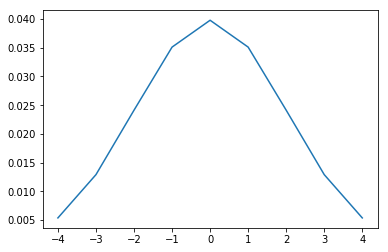

In [20]:
k,xx,yy = GaussKern(9,2)
kSize , __ = k.shape

plt.rcParams['figure.figsize'] = (6.0, 4.0)

# Use // for integer division
f = plt.plot(xx[kSize//2,],k[kSize//2,])

Example of 3D plotting of a 2D gaussian kernel

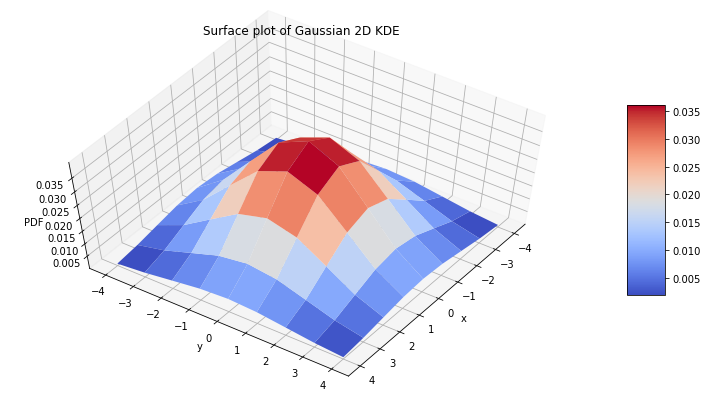

In [21]:
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

plt.rcParams['figure.figsize'] = (18.0, 18.0)
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, k, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)

Applying a mask convolution on an image:

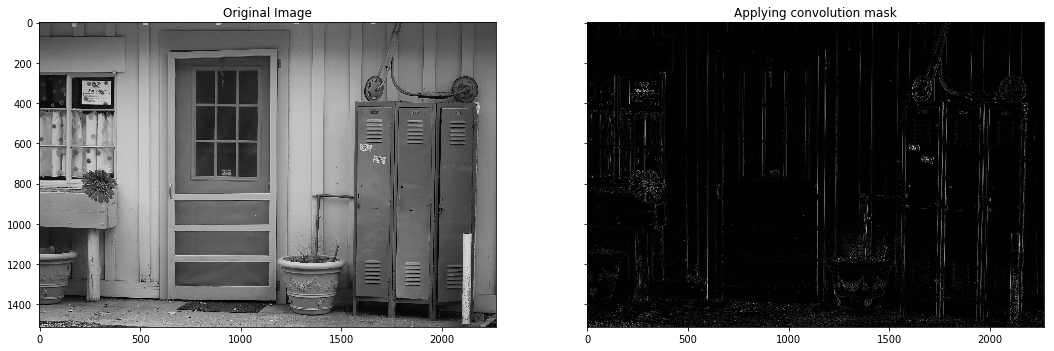

In [22]:
imageName = 'im1.jpg'
img = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)

mask = np.array(([[-1, 0 , 1]]))
resultConv = convolve2d(img, mask, mode='same')

absResultConv = abs(resultConv)

f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row')

ax1.imshow(img, cmap='gray'), ax1.set_title('Original Image')
ax2.imshow(absResultConv, cmap='gray'), ax2.set_title('Applying convolution mask')

savingName = imageName[:-4]+'Res.png'
#cv2.imwrite(savingName,cannyResults,[cv2.IMWRITE_JPEG_QUALITY, 100])
f.savefig(savingName)

# if you are using spider
#f.show()

